# **Scaled Dot-Product Attention**

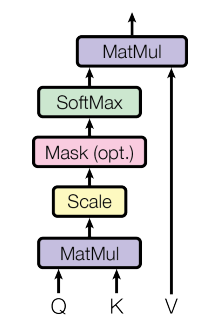
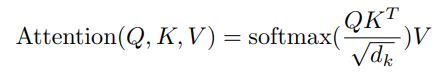

- Query: vector representation of one word
- Key: vector representation of all words
- Value: role of providing vector representation for query word, based on softmax values

In [ ]:
import torch
import math

batch_size = 1
num_heads = 2
seq_len_q = 5
seq_len_k = 5
d_k = 3        # vector dimension

Q = torch.randn(batch_size, num_heads, seq_len_q, d_k)
K = torch.randn(batch_size, num_heads, seq_len_k, d_k)
V = torch.randn(batch_size, num_heads, seq_len_k, d_k)
print("Q")
print(Q)

QK_matmul = torch.matmul(Q, K.transpose(-2, -1))       # transpose 5X3 to 3X5
print("QK_matmul")
print(QK_matmul)

d_k = Q.size(-1)
scale = QK_matmul / math.sqrt(d_k)
print("scale")
print(scale)

mask = torch.tril(torch.ones(seq_len_q, seq_len_k))
mask = mask.unsqueeze(0).unsqueeze(0)       # add two more dimensions
mask = mask.to(torch.bool)
neg_inf = -1e9
scale.masked_fill_(~mask, neg_inf)
print("mask")
print(scale)

softmax = torch.softmax(scale, dim=-1)
print("softmax")
print(softmax)

SV_matmul = torch.matmul(softmax, V)
print("SV_matmul")
print(SV_matmul)

Q
tensor([[[[ 0.0085,  0.8410,  0.1965],
          [-1.4601, -0.2416, -1.5822],
          [ 0.5208, -0.8150,  0.8042],
          [-0.5178,  0.2028, -1.4574],
          [ 1.0681,  0.8735,  0.2114]],

         [[-1.1140,  0.4196,  0.0255],
          [ 1.4804,  0.5461,  0.1174],
          [-1.2005,  0.3748, -0.3665],
          [ 0.7036, -0.6656, -0.6233],
          [ 2.0040, -0.6465,  1.4567]]]])
QK_matmul
tensor([[[[-1.4339, -0.3869, -0.8301,  1.1613, -0.6209],
          [ 1.7357,  2.2891,  1.4078, -2.7265,  1.6293],
          [ 0.2466, -0.8090,  0.1517,  0.0837, -0.1467],
          [ 1.5702,  1.5411,  0.7145, -1.3157,  0.8512],
          [-0.7957, -1.0013, -1.1413,  2.0939, -1.1449]],

         [[-1.1619, -2.1645,  1.8480,  0.5728,  1.6197],
          [ 2.5977,  2.1813, -2.1158, -0.4477, -1.1693],
          [-1.1295, -2.6445,  2.1198,  0.6617,  1.7977],
          [ 0.6345,  1.0998, -1.0713, -0.3800, -1.2052],
          [ 1.4309,  5.2251, -3.8815, -1.2573, -3.2874]]]])
scale
tensor([[[[-

# **Multi-Head Attention**

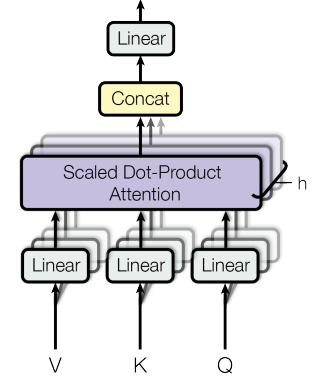
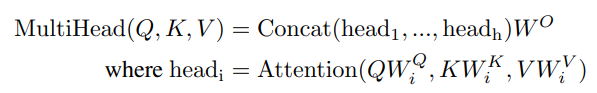

- concat: combining outputs from each attention
- last linear: role of refining information that has been gathered so far

In [ ]:
import torch.nn as nn

batch_size = 1
num_heads = 2
seq_len_q = 5
seq_len_k = 5
d_k = 3
d_model = num_heads * d_k

linear_q = nn.Linear(d_k, d_k)
linear_k = nn.Linear(d_k, d_k)
linear_v = nn.Linear(d_k, d_k)
last_linear = nn.Linear(d_model, d_model)

Q = torch.randn(batch_size, num_heads, seq_len_q, d_k)
K = torch.randn(batch_size, num_heads, seq_len_k, d_k)
V = torch.randn(batch_size, num_heads, seq_len_k, d_k)

Q = linear_q(Q)
K = linear_k(K)
V = linear_v(V)
print("linear_q")
print(Q)

QK_matmul = torch.matmul(Q, K.transpose(-2, -1))
d_k = Q.size(-1)
scale = QK_matmul / math.sqrt(d_k)
mask = torch.tril(torch.ones(seq_len_q, seq_len_k))
mask = mask.unsqueeze(0).unsqueeze(0)
mask = mask.to(torch.bool)
neg_inf = -1e9
scale.masked_fill_(~mask, neg_inf)
softmax = torch.softmax(scale, dim=-1)
SV_matmul = torch.matmul(softmax, V)
print("SV_matmul")
print(SV_matmul)

SV_concat = SV_matmul.permute(0, 2, 1, 3).contiguous().view(batch_size, seq_len_q, d_model)
print("SV_concat")
print(SV_concat)

attention_output = last_linear(SV_concat)
print("last_linear")
print(attention_output)

linear_q
tensor([[[[-0.1651,  0.4499,  1.0857],
          [-0.0407, -0.8361,  0.4132],
          [-0.4835,  0.5600,  0.4688],
          [-0.2491, -0.1611,  0.6594],
          [-0.3447, -0.0134,  0.2252]],

         [[-0.6513,  0.3837,  0.6127],
          [-0.3481,  0.4311,  0.3774],
          [ 0.1361,  1.3557,  1.2656],
          [-0.3412,  0.3971,  0.7070],
          [-1.0451,  0.1478, -0.1925]]]], grad_fn=<ViewBackward0>)
SV_matmul
tensor([[[[ 0.4054, -0.8000,  0.3529],
          [ 0.2963, -0.7799,  0.2818],
          [ 0.1483, -0.9199,  0.1036],
          [ 0.2220, -0.6930,  0.0830],
          [ 0.4452, -0.4055,  0.0505]],

         [[ 0.5670, -0.1633, -0.2018],
          [ 0.3365, -0.3452, -0.1259],
          [ 0.4462, -0.2996, -0.1243],
          [ 0.4655, -0.1713, -0.0262],
          [ 0.4638, -0.1148, -0.0478]]]], grad_fn=<UnsafeViewBackward0>)
SV_concat
tensor([[[ 0.4054, -0.8000,  0.3529,  0.5670, -0.1633, -0.2018],
         [ 0.2963, -0.7799,  0.2818,  0.3365, -0.3452, -0.12

# **Positional Encoding**

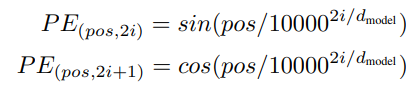

- pos: word order of one sentence
- Position of 2i and 2i+1 is vector order of one word, not i itself is vector order. For example, if i=0, (pos, 0) and (pos, 1) are made which means position values of both the first vector and the second vector are made.

In [ ]:
import math

pe0 = (
    math.sin(0 / 10000 ** (2*0 / 4)),
    math.cos(0 / 10000 ** (2*0 / 4)),
    math.sin(0 / 10000 ** (2*1 / 4)),
    math.cos(0 / 10000 ** (2*1 / 4))
)
print("pe0")
print(pe0)

pe1 = (
    math.sin(1 / 10000 ** (2*0 / 4)),
    math.cos(1 / 10000 ** (2*0 / 4)),
    math.sin(1 / 10000 ** (2*1 / 4)),
    math.cos(1 / 10000 ** (2*1 / 4))
)
print("pe1")
print(pe1)

pe2 = (
    math.sin(2 / 10000 ** (2*0 / 4)),
    math.cos(2 / 10000 ** (2*0 / 4)),
    math.sin(2 / 10000 ** (2*1 / 4)),
    math.cos(2 / 10000 ** (2*1 / 4))
)
print("pe2")
print(pe2)

pe3 = (
    math.sin(3 / 10000 ** (2*0 / 4)),
    math.cos(3 / 10000 ** (2*0 / 4)),
    math.sin(3 / 10000 ** (2*1 / 4)),
    math.cos(3 / 10000 ** (2*1 / 4))
)
print("pe3")
print(pe3)

pe0
(0.0, 1.0, 0.0, 1.0)
pe1
(0.8414709848078965, 0.5403023058681398, 0.009999833334166664, 0.9999500004166653)
pe2
(0.9092974268256817, -0.4161468365471424, 0.01999866669333308, 0.9998000066665778)
pe3
(0.1411200080598672, -0.9899924966004454, 0.02999550020249566, 0.9995500337489875)


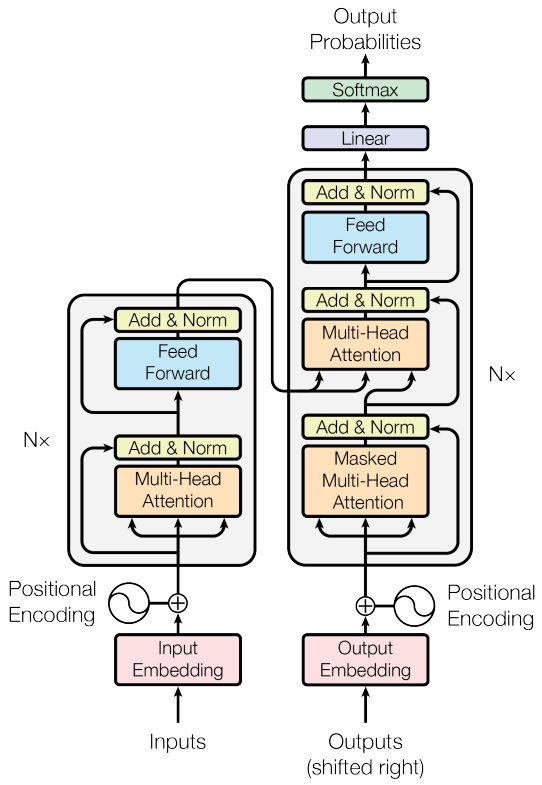

In [ ]:
import torch.nn.functional as F

d_model = 4
nhead = 4
num_encoder_layers = 6
num_decoder_layers = 6
dim_feedforward = 128

transformer = nn.Transformer(d_model=d_model,
                             nhead=nhead,
                             num_encoder_layers=num_encoder_layers,
                             num_decoder_layers=num_decoder_layers,
                             dim_feedforward=dim_feedforward)

word_to_idx = {
    "are": 0,
    "you": 1,
    "happy": 2,
    "yes": 3
}

src_sentence = ["are", "you", "happy"]
tgt_sentence = ["yes"]
src_indices = torch.tensor([word_to_idx[word] for word in src_sentence])
tgt_indices = torch.tensor([word_to_idx[word] for word in tgt_sentence])
src_indices = src_indices.unsqueeze(1)
tgt_indices = tgt_indices.unsqueeze(1)

embedding = nn.Embedding(num_embeddings=len(word_to_idx), embedding_dim=d_model)
src_embedding = embedding(src_indices)
tgt_embedding = embedding(tgt_indices)
print("embedding")
print(src_embedding)
print(tgt_embedding)

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=10):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        seq_len = x.size(0)
        pe = self.pe[:, :seq_len]
        return x + pe.transpose(0, 1)


pos_encoder = PositionalEncoding(d_model)
src_embedding_with_pos = pos_encoder(src_embedding)
tgt_embedding_with_pos = pos_encoder(tgt_embedding)
print("src_embedding_with_pos")
print(src_embedding_with_pos)
print("tgt_embedding_with_pos")
print(tgt_embedding_with_pos)

decoder_output = transformer(src_embedding_with_pos, tgt_embedding_with_pos)
print("decoder_output")
print(decoder_output)

vocab_size = len(word_to_idx)
linear = nn.Linear(d_model, vocab_size)

linear_output = linear(decoder_output)
print("linear_output")
print(linear_output)

probabilities = F.softmax(linear_output, dim=-1)
print("probabilities")
print(probabilities)

embedding
tensor([[[ 0.8717,  0.1735,  0.4284, -0.5875]],

        [[-0.9969, -0.1248,  1.3343,  0.4783]],

        [[ 0.5831,  0.9043, -0.2062, -0.0711]]], grad_fn=<EmbeddingBackward0>)
tensor([[[-0.0397,  1.2154, -1.0706, -0.3284]]], grad_fn=<EmbeddingBackward0>)
src_embedding_with_pos
tensor([[[ 0.8717,  1.1735,  0.4284,  0.4125]],

        [[-0.1554,  0.4155,  1.3443,  1.4782]],

        [[ 1.4924,  0.4882, -0.1862,  0.9287]]], grad_fn=<AddBackward0>)
tgt_embedding_with_pos
tensor([[[-0.0397,  2.2154, -1.0706,  0.6716]]], grad_fn=<AddBackward0>)
decoder_output
tensor([[[-0.9006,  0.5171,  1.3851, -1.0016]]],
       grad_fn=<NativeLayerNormBackward0>)
linear_output
tensor([[[-0.7197,  0.8740, -0.2094,  0.8089]]], grad_fn=<ViewBackward0>)
probabilities
tensor([[[0.0820, 0.4035, 0.1365, 0.3780]]], grad_fn=<SoftmaxBackward0>)


# **Learning Rate**

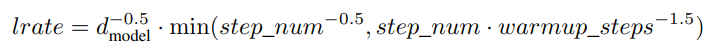

- Learning rate increases until warmup_steps, and then decreases
- The more d_model, the less learning rate so that model can learn complicated representation stably.

In [48]:
d_model = 300
step_num = 1000
warmup_steps = 4000
lrate = (d_model ** -0.5) * min(step_num ** -0.5, step_num * (warmup_steps ** -1.5))
print(step_num ** -0.5)
print(step_num * (warmup_steps ** -1.5))
print(lrate)

0.03162277660168379
0.003952847075210475
0.00022821773229381924


# **Label Smoothing**

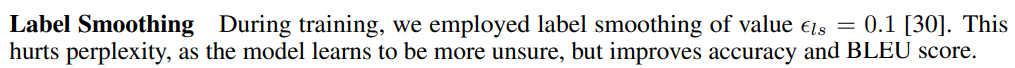

- Although model's performance from training data becomes worse by label smoothing, it from other data becomes better reducing overfitting.

In [64]:
import numpy as np

def label_smoothing(true_labels, smoothing_factor=0.1):
    num_classes = len(true_labels)
    smooth_label = np.array(true_labels) * (1 - smoothing_factor)
    print(smooth_label)
    smooth_label += smoothing_factor / num_classes        # make sum of values 1
    print(smooth_label)
    return smooth_label

true_labels = [0.9, 0.07, 0.03]

smoothed_labels = label_smoothing(true_labels, smoothing_factor=0.1)

[0.81  0.063 0.027]
[0.84333333 0.09633333 0.06033333]
